<a href="https://colab.research.google.com/github/jazz-dev/solid-broccoli-AI/blob/main/2_class_spiral_dataset_for_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

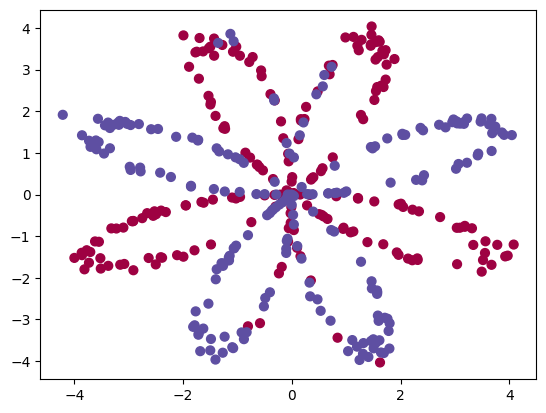

cost after  0 iteration is :  0.6931125167719424
cost after  1000 iteration is :  0.690769022988963
cost after  2000 iteration is :  0.6796765214894879
cost after  3000 iteration is :  0.6664456671632039
cost after  4000 iteration is :  0.642080989446702
cost after  5000 iteration is :  0.6244000348842776
cost after  6000 iteration is :  0.6139285677885676
cost after  7000 iteration is :  0.5924678485570568
cost after  8000 iteration is :  0.5225076248975544
cost after  9000 iteration is :  0.4588374978872447


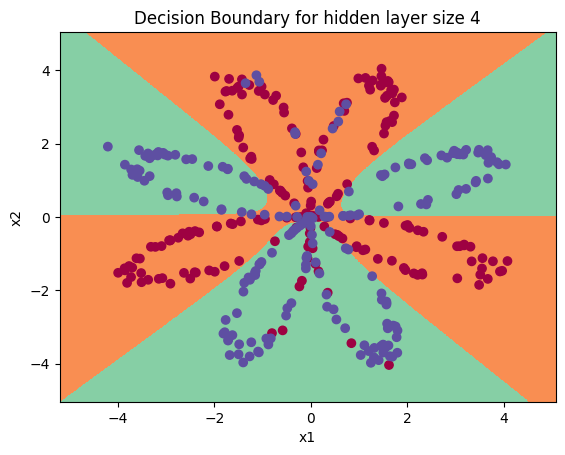

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn

def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

def load_planner_dataset():
    np.random.seed(1)
    m = 400  # Number of examples
    N = int(m / 2)  # Number of points per class
    D = 2  # Dimensionality
    X = np.zeros((m, D))  # Data matrix where each row is a single example
    Y = np.zeros((m, 1), dtype='uint8')  # Labels vector (0 for red, 1 for blue)
    a = 4  # Maximum radius of the flower

    for j in range(2):
        ix = range(N * j, N * (j + 1))
        t = np.linspace(j * 3.12, (j + 1) * 3.12, N) + np.random.randn(N) * 0.2  # Theta
        r = a * np.sin(4 * t) + np.random.randn(N) * 0.2  # Radius
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

# Load dataset
X, Y = load_planner_dataset()

# Visualise the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
plt.show()

#initializing weights and biases
W1 = np.random.randn(4, X.shape[0]) * 0.01
b1 = np.zeros(shape =(4, 1))

W2 = np.random.randn(Y.shape[0], 4) * 0.01
b2 = np.zeros(shape =(Y.shape[0], 1))

def forward_propagation(X, W1, W2, b1, b2):

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    # here the cache is the data of previous iteration
    # This will be used for backpropagation
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache
# Here Y is actual output
def compute_cost(A2, Y):
    m = Y.shape[1]

    # implementing the above formula

    cost = -(1/m)*np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2))

    # Squeezing to avoid unnecessary dimensions
    cost = np.squeeze(cost)
    return cost
def back_propagation(W1, b1, W2, b2, cache, learning_rate):

    # Retrieve also A1 and A2 from dictionary "cache"
    A1 = cache['A1']
    A2 = cache['A2']

    m = Y.shape[1]

    # Backward propagation: calculate dW1, db1, dW2, db2.
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True)

    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True)

    # Updating the parameters according to algorithm
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    return W1, W2, b1, b2
# Please note that the weights and bias are global
# Here iterations is epochs

iterations = 10000
learning_rate = 0.01


costs = []  # List to hold cost values

for i in range(0, iterations):
    # Forward propagation. Inputs: "X, parameters". return: "A2, cache".
    A2, cache = forward_propagation(X, W1, W2, b1, b2)

    # Cost function. Inputs: "A2, Y". Outputs: "cost".
    cost = compute_cost(A2, Y)

    # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
    W1, W2, b1, b2 = back_propagation(W1, b1, W2, b2, cache, learning_rate)

    # Print the cost every 1000 iterations
    if(i%(iterations/10) == 0):
        print("cost after ", i, "iteration is : ", cost)

import matplotlib.pyplot as plt

# Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z, _ = model(np.c_[xx.ravel(), yy.ravel()].T, W1, W2, b1, b2)
    Z = Z > 0.5  # Apply threshold to classify the points
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title("Decision Boundary for hidden layer size 4")
    plt.show()

# Use the forward_propagation function with trained weights and biases
plot_decision_boundary(forward_propagation, X, Y)


